In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import Library

In [ ]:
#libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [ ]:
df_train=pd.read_csv("/kaggle/input/titanic/train.csv")

In [ ]:
# veriye ön bakış
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Üzerine çalışmak için datanın kopyasını alarak çalışmak için bir df oluşturduk.
df=df_train.copy()

In [ ]:
# verinin satır ve sütun sayısı
df.shape

(891, 12)

In [ ]:
# Hayatta kalanların ve kalmaynların sayıları
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# ÖDEVLER

## 1. kazada ölenlerin yaş ortalaması

In [ ]:
df.loc[df["Survived"]==0]["Age"].mean()

30.62617924528302

## 2.Kazada ölenlerin bilet fiyatlarının ortalamasını ve medyanını bulunuz

In [ ]:
df.loc[df["Survived"]==0]["Fare"].mean()

#eğer yuvarlamak isterseniz mean().round(2) yapabilirsiniz

22.117886885245902

In [ ]:
df.loc[df["Survived"]==0]["Fare"].median()

10.5

## 3.kazada ölen erkeklerin yaş ortalamasını bulunuz

In [ ]:

df[(df["Sex"]=="male") & (df["Survived"]==0)]["Age"].mean().round(2)


31.62

## 4. kazada ölen kadınların yaş ortalamasını bulunuz

In [ ]:
#kazada ölen kadinlarin yaş ortalamasını bulun
df[(df["Sex"]=="female") & (df["Survived"]==0)]["Age"].mean().round(2)

25.05

## 5.kazadan kurtulanların yaş ortalamasını bulunuz


In [ ]:
df.loc[df["Survived"]==1]["Age"].mean()

28.343689655172415

## 6.kazadan kurtulanların yaş ortalamasını bulunuz

In [ ]:
#kazadan kurtulanların bilet fiyatlarının ortalaması
df[df["Survived"]==1]["Fare"].mean()

48.39540760233918

## 7.Kazadan kurtulan toplam kişi sayısını bulunuz


In [ ]:
df.loc[df["Survived"]==1].count()[0]

342

In [ ]:
#Kazadan kurtulan toplam kişi sayısını bulunuz
len(df.loc[df["Survived"]==1])

342

## 8. 10 yaşından küçüklerin bilet fiyatlarının medyan değerini bulunuz.

In [ ]:
df[df["Age"]<10]["Fare"].median()

27.0

## 9. 1.sınıf, 2.sınıf ve 3.sınıf bilet fiyatlarının ortalama ve medyanlarını karşılaştırınız.


In [ ]:
# mean
df.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [ ]:
# median
df.groupby("Pclass")["Fare"].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [ ]:
# değişken özelinde  sonuç aradığım zaman agg kullanmak daha kolaylık sağlayacaktır.
df.groupby("Pclass").agg({"Fare":["mean","median"]})

Fare         
             mean   median
Pclass                    
1       84.154687  60.2875
2       20.662183  14.2500
3       13.675550   8.0500

## 10. Kazada ölen kadınların oranı ile erkeklerin oranını karşılaştırınız.

(Örnek: erkekler için; ölen erkeklerin, erkek sayısına bölümü bu oranı vermektedir.


In [ ]:
# kazada ölen erkeklerin sayısını, tüm erkeklerşn sayısına bölersek orana ulaşırız.
len(df.loc[(df["Survived"]==0) & (df["Sex"]=="male")]) / len(df.loc[df["Sex"]=="male"])

0.8110918544194108

In [ ]:
# kazada ölen kadınların sayısını, tüm kadınların sayısına bölersek orana ulaşırız.
len(df.loc[(df["Survived"]==0) & (df["Sex"]=="female")]) / len(df.loc[df["Sex"]=="female"])

0.25796178343949044

### Sonuç olarak erkeklerin ölme oranı (0.81), kadınların ölme oranından (0.25) daha fazladır.

## Veri üzerine görselleştirmeler

### Yaş dağılımı

<Axes: xlabel='Age', ylabel='Density'>

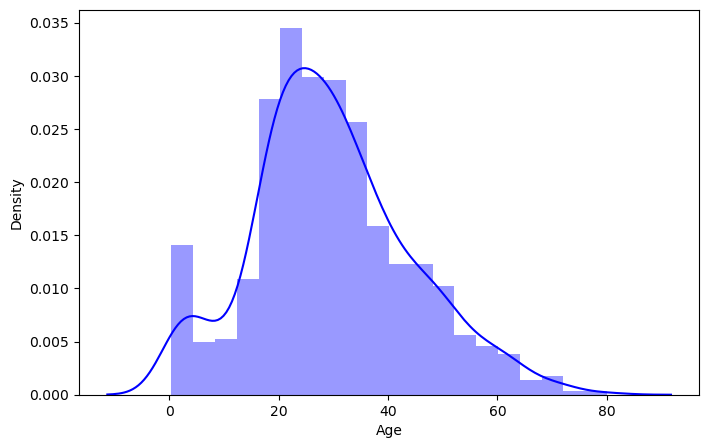

In [ ]:
#figsize ile grafikler genişletilebilir
plt.figure(figsize=(8,5))
sns.distplot(df["Age"],color="blue")

### Bilet Fiyatlarının Dağılımı

<Axes: xlabel='Fare', ylabel='Density'>

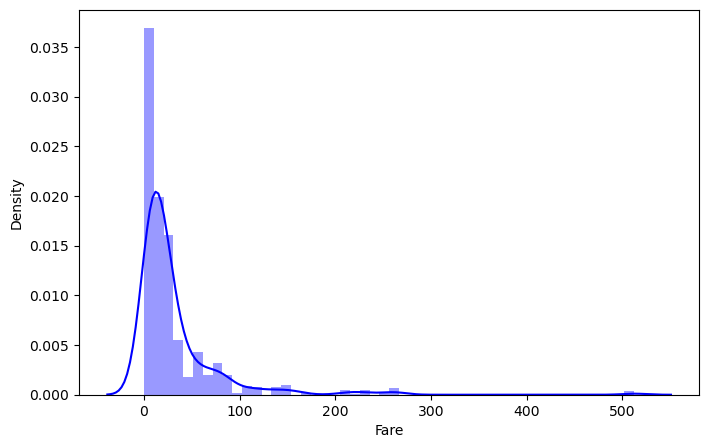

In [ ]:
#figsize ile grafikler genişletilebilir
plt.figure(figsize=(8,5))
sns.distplot(df["Fare"],color="blue")

### Kazada ölenlerin ve ölmeyenlerin yaş ortalaması (catplot)

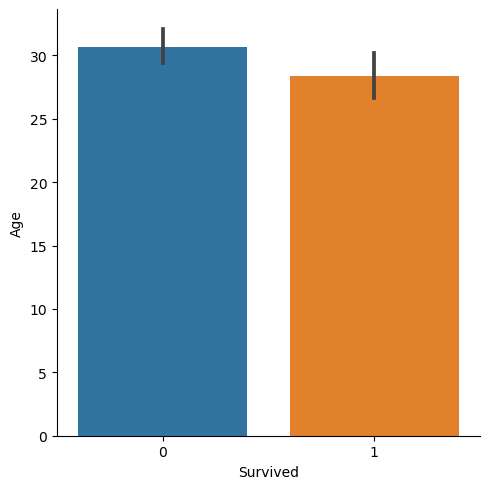

In [ ]:
# Hayatını kaybedenlerin yaş ortalaması daha fazladır.
sns.catplot(x="Survived",y="Age",data=df, kind="bar")
plt.show()

### Kazada ölenlerin ve ölmeyenlerin biley fiyatı ortalaması (catplot)

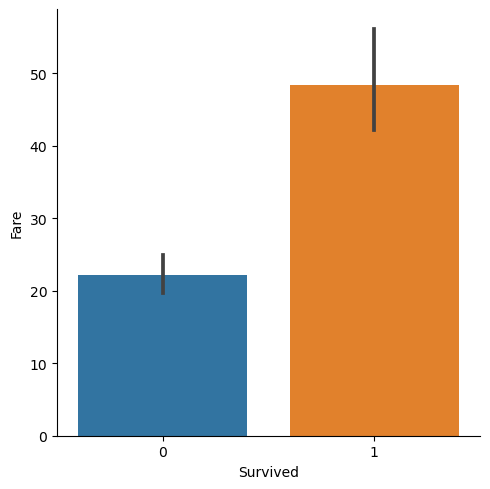

In [ ]:
# hayatta kalanların ödediği bilet fiyatlarının ortlaması daha fazladır.
sns.catplot(x="Survived",y="Fare",data=df, kind="bar")
plt.show()